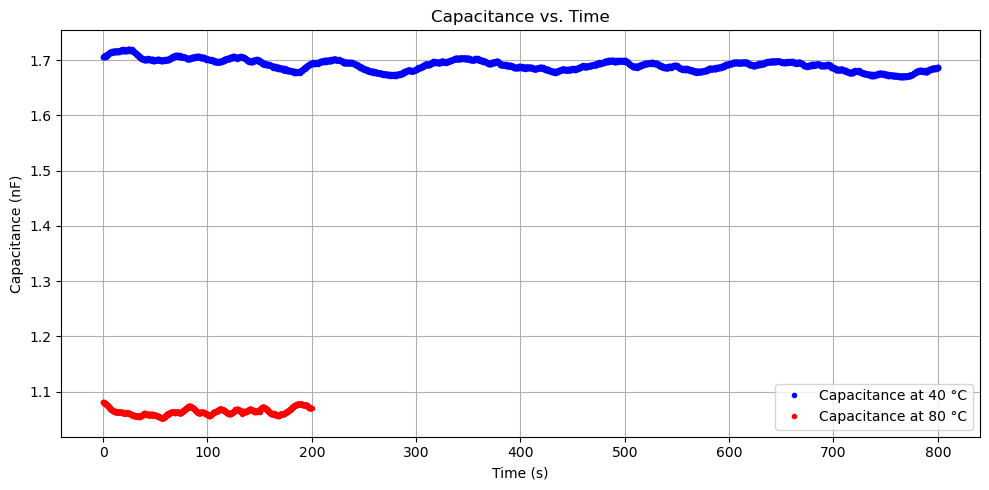

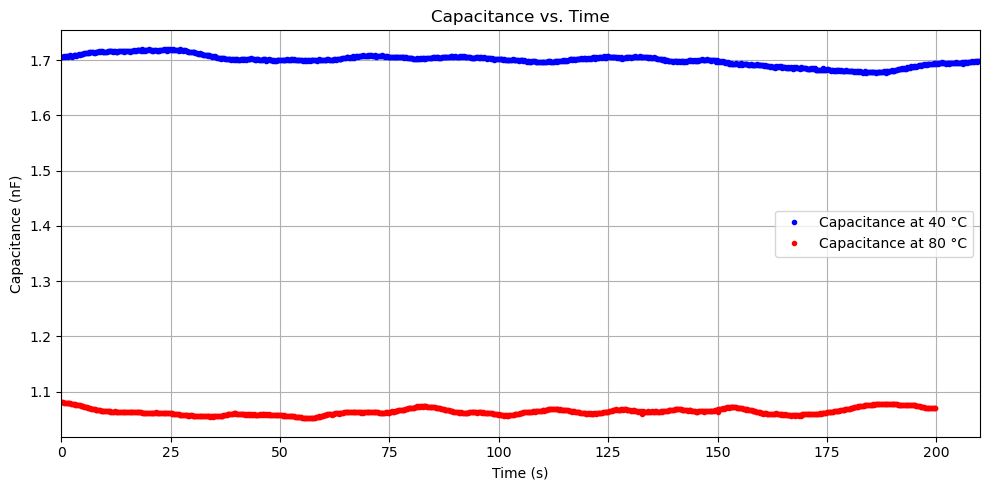

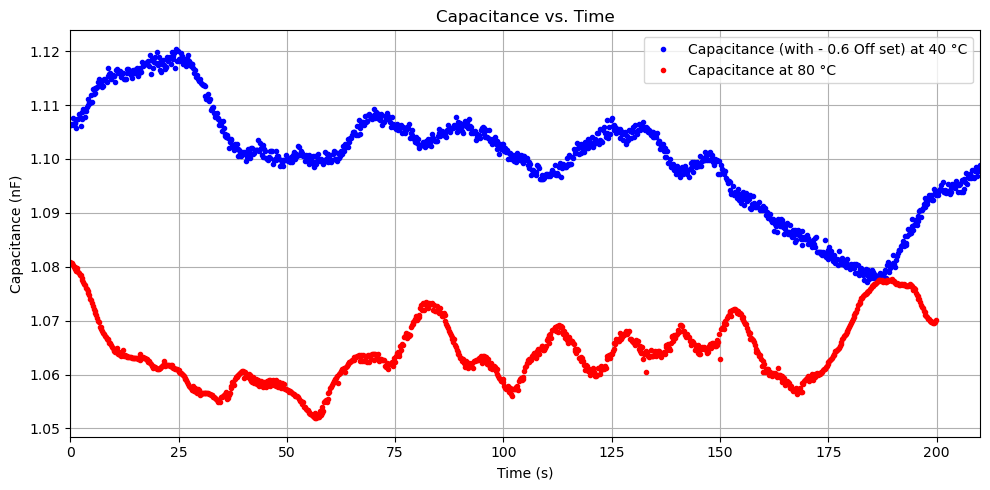

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# ---------------------------
# Helper to load a dataset
# ---------------------------
def load_data(filename, delimiter='\t',cut=None):
    data = np.loadtxt(filename, delimiter=delimiter)
    t = data[:, 0][:cut]
    T = data[:, 1][:cut]
    C_nF = data[:, 2][:cut]
    return t, T, C_nF

# ---------------------------
# Helper to find stable temperature region
# ---------------------------
def find_stable_region(t, T, tol=0.05):
    T_mean = np.mean(T)
    stable_mask = np.abs(T - T_mean) < tol
    if np.any(stable_mask):
        t_stable = t[stable_mask]
        t_start = t_stable.min()
        t_end = t_stable.max()
    else:
        t_start, t_end = None, None
    return T_mean, t_start, t_end

# ---------------------------
# Load both datasets
# ---------------------------
file_40 = "Data/40_40T_1dT_4000N.lvm"
file_80 = "Data/80_80T_1dT_1000N.lvm"

t_40, T_40, C_40 = load_data(file_40,cut=9998)
t_80, T_80, C_80 = load_data(file_80)


# ---------------------------
# Plot C vs t for both
# ---------------------------
plt.figure(figsize=(10, 5))
plt.plot(t_40, C_40, 'b.', label='Capacitance at 40 °C')
plt.plot(t_80, C_80, 'r.', label='Capacitance at 80 °C')
plt.xlabel("Time (s)")
plt.ylabel("Capacitance (nF)")
plt.title("Capacitance vs. Time")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


# ---------------------------
# Plot C vs t for both
# ---------------------------
plt.figure(figsize=(10, 5))
plt.plot(t_40, C_40, 'b.', label='Capacitance at 40 °C')
plt.plot(t_80, C_80, 'r.', label='Capacitance at 80 °C')
plt.xlabel("Time (s)")
plt.ylabel("Capacitance (nF)")
plt.xlim(0,210)
plt.title("Capacitance vs. Time")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()




# ---------------------------
# Plot C vs t for both
# ---------------------------
plt.figure(figsize=(10, 5))
plt.plot(t_40, C_40 - 0.6 , 'b.', label='Capacitance (with - 0.6 Off set) at 40 °C')
plt.plot(t_80, C_80, 'r.', label='Capacitance at 80 °C')
plt.xlabel("Time (s)")
plt.ylabel("Capacitance (nF)")
plt.xlim(0,210)
plt.title("Capacitance vs. Time")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()





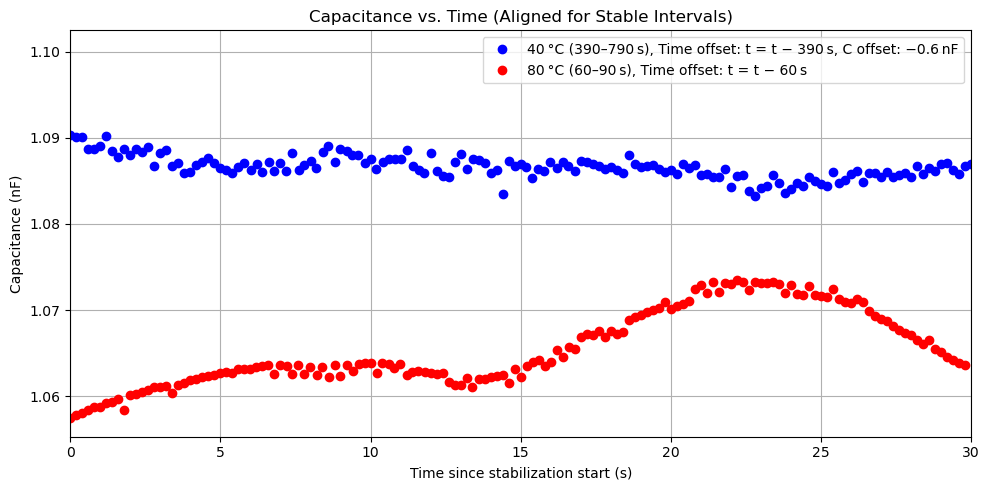

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming t_40, C_40, t_80, C_80 are numpy arrays already loaded

# Define masks for the stable temperature intervals
mask_40 = (t_40 >= 390) & (t_40 <= 790)  # 40 °C stable from 390s to 790s
mask_80 = (t_80 >= 60) & (t_80 <= 90)    # 80 °C stable from 60s to 90s

# Apply masks to extract stable regions
t_40_stable = t_40[mask_40]
C_40_stable = C_40[mask_40]

t_80_stable = t_80[mask_80]
C_80_stable = C_80[mask_80]

# ------------------------------------
# Align time axes (shift to t = 0)
# ------------------------------------
t_40_aligned = t_40_stable - t_40_stable[0]  # Align 40°C start to 0s
t_80_aligned = t_80_stable - t_80_stable[0]  # Align 80°C start to 0s

# ------------------------------------
# Plotting Capacitance vs. Time (aligned)
# ------------------------------------
plt.figure(figsize=(10, 5))

# Plot 40 °C data with a −0.6 nF offset for visual separation
plt.plot(
    t_40_aligned,
    C_40_stable - 0.6,
    'bo',
    label='40 °C (390–790 s), Time offset: t = t − 390 s, C offset: −0.6 nF'
)

# Plot 80 °C data as-is
plt.plot(
    t_80_aligned,
    C_80_stable,
    'ro',
    label='80 °C (60–90 s), Time offset: t = t − 60 s'
)

# Axis labels and formatting
plt.xlabel("Time since stabilization start (s)")
plt.ylabel("Capacitance (nF)")
plt.title("Capacitance vs. Time (Aligned for Stable Intervals)")
plt.xlim(0, 30)  # Optional zoom in on the shared interval
plt.grid(True)
plt.legend(loc='best')
plt.tight_layout()
plt.show()
